In [55]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [56]:
#Import data
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Questions 

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

## Q1. Do smokers have higher insurance charges than non-smokers?

    -State your Null Hypothesis and Alternative Hypothesis:
        - The null hypothesis () : There is no differance in amount charged by insurances to smokers versus non-smokers.
        - The Alternate hypothesis: There is a differance in the amount charged by insurance to smokers versus non smokers.


## Defining hypothesis testing variables

In [57]:
smokers = df.loc[ df['smoker'] == 'yes',['charges']]
smokers.head()

,charges
0,16884.9240
11,27808.7251
14,39611.7577
19,36837.4670
23,37701.8768


In [58]:
non_smokers= df.loc[ df['smoker'] == 'no',['charges']]
non_smokers.head()

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160


In [59]:
data_smoker = smokers['charges']
mean_smoker = np.mean(data_smoker)
print("The mean charges for a smoker are: ", mean_smoker)
std_smoker = np.std(data_smoker)
print("The std deviation charges for a smoker are: ", std_smoker)
min_smoker = np.min(data_smoker)
print("The min charges for a smoker are: ", min_smoker)
max_smoker= np.max(data_smoker)
print("The max charges for a smoker are: ",max_smoker)

The mean charges for a smoker are:  32050.23183153284
The std deviation charges for a smoker are:  11520.46670652943
The min charges for a smoker are:  12829.4551
The max charges for a smoker are:  63770.42801


In [60]:
data_non_smoker = non_smokers['charges']
mean_data_Non = np.mean(data_non_smoker)
print("The meam charges for a smoker are: ",mean_data_Non)
std_data_Non = np.std(data_non_smoker)
print("The std deviation charges for a smoker are: ",std_data_Non)
min_data_Non = np.min(data_non_smoker)
print("The min charges for a smoker are: ",min_data_Non)
max_data_Non = np.max(data_non_smoker)
print("The max charges for a smoker are: ",max_data_Non)

The meam charges for a smoker are:  8434.268297856204
The std deviation charges for a smoker are:  5990.9645302876115
The min charges for a smoker are:  1121.8739
The max charges for a smoker are:  36910.60803


In [61]:
non_smokers.info

<bound method DataFrame.info of           charges
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
...           ...
1332  11411.68500
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500

[1064 rows x 1 columns]>

## Sanity Check ##

In [62]:
mean_smoker>mean_data_Non

True

In [63]:
std_smoker>std_data_Non

True

In [64]:
min_smoker>min_data_Non

True

In [65]:
max_smoker>max_data_Non

True

## Smoker data Descriptive statistics

In [66]:
data_smoker = smokers['charges']
mean_smoker = np.mean(data_smoker)
std_smoker = np.std(data_smoker)
min_smoker = np.min(data_smoker)
max_smoker= np.max(data_smoker)

In [67]:
max_smoker

63770.42801

In [68]:
min_smoker

12829.4551

In [69]:
low_end = max_data_Non
high_end = max_smoker

In [70]:
x_range = np.linspace(low_end, high_end)

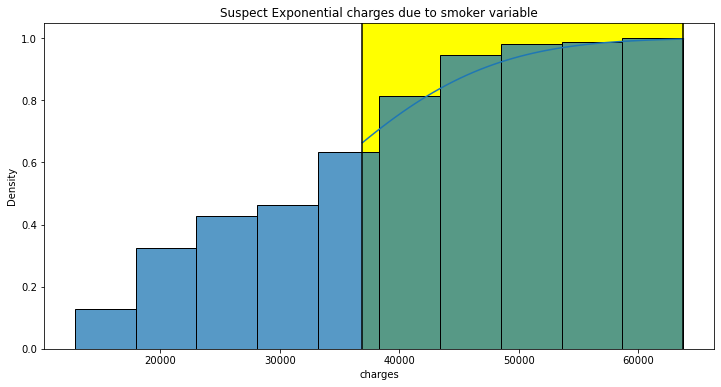

In [71]:
cdf = stats.norm.cdf(x_range, loc=mean_smoker, scale=std_smoker)
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data_smoker, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Suspect Exponential charges due to smoker variable');

In [72]:

1-stats.norm.cdf(low_end, loc=np.mean(data_smoker), scale= np.std(data_smoker))

0.33655244882275026

## There is a 33 percent chance that a mean of a non smoker would have a charge equal to or greater than that of a smoker

These findings do not seem to support expected outcome of rejecting null hypothesis switching testing to trial other testing approahes: 2 sample T- Test

In [73]:
import scipy.stats as stats

In [74]:
zscores_f = stats.zscore(data_smoker)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [75]:
zscores_f = stats.zscore(data_non_smoker)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

24

In [76]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_non_smoker = np.abs(stats.zscore(data_non_smoker)) > 3
print(f"There are {is_outlier_non_smoker.sum()} outliers in the discounted products group out of {len(data_non_smoker)})")

There are 24 outliers in the discounted products group out of 1064)


In [77]:
is_outlier_non_smoker.loc[~is_outlier_non_smoker]

1       False
2       False
3       False
4       False
5       False
        ...  
1332    False
1333    False
1334    False
1335    False
1336    False
Name: charges, Length: 1040, dtype: bool

In [78]:
data_non_smoker = data_non_smoker.loc[~is_outlier_non_smoker]
data_non_smoker

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [79]:
data_non_smoker.keys

<bound method Series.keys of 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64>

In [80]:
data_non_smoker.describe()

count     1040.000000
mean      7939.860845
std       5070.199161
min       1121.873900
25%       3932.824475
50%       7205.596325
75%      11091.444075
max      26392.260290
Name: charges, dtype: float64

## Checking for Normality

  According to the workflow on the LP, since both groups have n > 15, we can safely ignore the assumption of normality.  Seriously, not trying to be lazy, but these are both pretty statistically robust data sets from an N= standpoint.  

## Checking for Equal Variance

In [81]:
result = stats.levene(data_non_smoker, data_smoker )
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


*  According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. Since our p-value is less than .05 we reject that null hypothesis and conclude that our groups do NOT have equal variance.

* Since we did NOT meet the assumption of equal variance, we will run our stats.ttest_ind using equal_var=False. This will run a Welch's T-Test, which is designed to account for unequal variance.

[Much of this borrowed from James via classwork. It is worded so eloquently I don't honestly think I could have come up with better, so I just adjusted these statements to fit my case.]

## Testing hypothesis of difference in smoker and non-smoker means using Welch's T-Test for non-equal variance sample groups.

In [82]:
result = stats.ttest_ind(data_non_smoker, data_smoker, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)


True

# Final Conclusion

* Our Welch's T-Test return a p-value < .05 (it was actually p <.000000001!) we reject the null hypothesis and support the alternative hypothesis that there is a significant statistical difference in the medical charges incurred by smokers versus non-smokers.
* In order to know if those quantities are significantly MORE or LESS, we look at the actual means of our final groups.

In [83]:
print(f"The Mean cost for non smokers {data_non_smoker.mean():.2f}")
print(f"The Mean cost for smokers {data_smoker.mean():.2f}")

The Mean cost for non smokers 7939.86
The Mean cost for smokers 32050.23


## - Q2. Are men more likely to smoke than women?

* Null hypothesis- there is no difference in gender determination in respect to smoking
* Alternate hypothesis - one gender is likely to smoke than the other. 

In [84]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


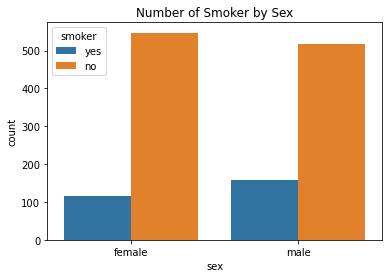

In [85]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smoker by Sex");

In [86]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [87]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [88]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Since our p < .05, we reject the null hypothesis that there is no relationship between a persons gender and if they smoke.
This means that we accept the alternate hypothesis and conclude that there is a relationship between a person's gender and if they smoke or not.

## Q3. Do different regions have different charges, on average?

In [89]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


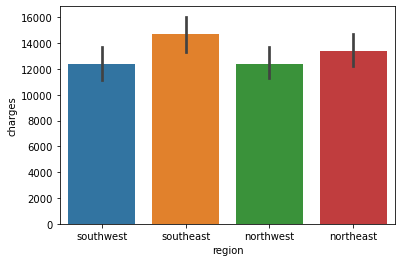

In [90]:
sns.barplot(data=df, x='region',y='charges');

Null Hypothesis:  Different diets all have the same results. (the kg_lost is not significantly different between diets)

Alternative Hypothesis: Different diets have different results. (the kg_lost is significantly different between diets)

Using an alpha=.05

In [91]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

# Testing Assumptions

## Assumption of Normality

In [92]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [93]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


## Testing Assumption of Equal Variance

In [94]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

failed for equal variance select kruskal wallace

In [95]:
stats.kruskal(*groups.values())

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

# Conclusion 

Our test showed a p-value greater than 0.05, which is indicative that regions did not show a statistical difference in pricing.  